### L4 Demo 5 - Azure Video Analyzer

### You should be able to see this video at the Video Analyzer portal

##### Importing Useful Python Libraries or Packages 

In [1]:
import io
import datetime
import pandas as pd
from PIL import Image
import requests
import io
import glob, os, sys, time, uuid

from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
%matplotlib inline

from urllib.parse import urlparse
from io import BytesIO
from PIL import Image, ImageDraw

from video_indexer import VideoIndexer
from azure.cognitiveservices.vision.face import FaceClient
from azure.cognitiveservices.vision.face.models import TrainingStatusType
from msrest.authentication import CognitiveServicesCredentials

### Documentation
- https://docs.microsoft.com/en-us/azure/azure-video-analyzer/video-analyzer-for-media-docs/video-indexer-use-apis

### Set up the Video Analyzer Portal Login:
- https://www.videoindexer.ai/account
- https://www.videoindexer.ai/media/library  - All uploaded video

### Get API Subscription:
https://api-portal.videoindexer.ai/

### Article
- https://medium.com/microsoftazure/visual-brand-detection-with-azure-video-indexer-cd65330b908c

In [2]:
CONFIG = {
    'SUBSCRIPTION_KEY': '----------------------------',
    'LOCATION': '-----',
    'ACCOUNT_ID': '-----------------------------------'
}

video_analysis = VideoIndexer(
    vi_subscription_key=CONFIG['SUBSCRIPTION_KEY'],
    vi_location=CONFIG['LOCATION'],
    vi_account_id=CONFIG['ACCOUNT_ID']
)

### Location Parameter
 - For paid service, please use service region i.e. westus2, eastus, etc.
 - For trial or free service, just use "trial" as I have used above. 

In [3]:
video_analysis.check_access_token()

Getting video indexer access token...
Access Token: eyJhbGciOiJSUzI1NiIsInR5cCI6IkpXVCJ9.eyJWZXJzaW9uIjoiMi4wLjAuMCIsIktleVZlcnNpb24iOiJlMzEzZDcxYmJmYTM0YzQyYjM2NDg5ZWM3NDczMTNmMSIsIkFjY291bnRJZCI6Ijc2ZDQzZTU1LTA3MmItNDFkNS1hYTFjLTZmNTI5ZWJmYzk0NiIsIkFjY291bnRUeXBlIjoiVHJpYWwiLCJQZXJtaXNzaW9uIjoiQ29udHJpYnV0b3IiLCJFeHRlcm5hbFVzZXJJZCI6IjU4Mjk3MDk0MDdGRDQxMTRBNTQ2RkQ0NDFGOTk0RUI1IiwiVXNlclR5cGUiOiJNaWNyb3NvZnRDb3JwQWFkIiwiSXNzdWVyTG9jYXRpb24iOiJUcmlhbCIsIm5iZiI6MTY5MzY4MDMxNywiZXhwIjoxNjkzNjg0MjE3LCJpc3MiOiJodHRwczovL2FwaS52aWRlb2luZGV4ZXIuYWkvIiwiYXVkIjoiaHR0cHM6Ly9hcGkudmlkZW9pbmRleGVyLmFpLyJ9.EPpttp3et8YGWiygbMQZfHeTPkKdoBeVqN8l10W3ZwwRBdcaj5sBZCiYLZXz4dJUYdOtw7qcKlaSEiG4BjCkLfevOmzw9AOuHxsgYlKTzx-i8WEpNn-PRGb_eUB_koHThQVbOphLdRacqV4jc19R09Pi8BesIxfau8MXpCvzYibRvoZTZ4gNJOJSvlfr4TgyT34fO-NzUsmogphkJdsV6Owdvoe5t3z4bWPhlPMt5NrA3WU8U_SbWyCj8ZJ0DtSPbLgRyuwRLmB8a1ASjihw1S16pMHVhio0WFXt3jk02YYM6gT2j4fP76fb8X0f-twCaItZGGnkhPZN5mG-m6_ICA


### Uploading a video from local disk to Video Analyzer portal

- My sample video is saved in this workspace environment, and the "input_filename" variable in the cell below is currently set to its path in this environment.
- If you want to upload your own video from this workspace environment to Video Analyzer portal, first upload your video to the workspace, then change the "input_filename" variable to reflect the name of your video.

In [4]:

notebook_path = os.path.abspath("L4Demo5-VideoAnalyzer")
video_path = os.path.join(os.path.dirname(notebook_path), "video-indexer-demo-video.mp4")

uploaded_video_id = video_analysis.upload_to_video_indexer(
   input_filename= video_path,
   video_name='avkash-11-second',  # unique identifier for video in Video Indexer platform
   video_language='English'
)

Uploading video to video indexer...


In [5]:
uploaded_video_id

'cb253b1e43'

In [6]:
info = video_analysis.get_video_info(uploaded_video_id, video_language='English')

Getting video info for: cb253b1e43
Video still processing, current status: 18%


In [7]:
info

{'partition': None,
 'description': None,
 'privacyMode': 'Private',
 'state': 'Processing',
 'accountId': '76d43e55-072b-41d5-aa1c-6f529ebfc946',
 'id': 'cb253b1e43',
 'name': 'avkash-11-second',
 'userName': 'Mohamed 9601413',
 'created': '2023-09-02T18:52:14.4533333+00:00',
 'isOwned': True,
 'isEditable': True,
 'isBase': True,
 'durationInSeconds': 10,
 'duration': '0:00:10.574978',
 'summarizedInsights': {'name': 'avkash-11-second',
  'id': 'cb253b1e43',
  'privacyMode': 'Private',
  'duration': {'time': '0:00:10.574978', 'seconds': 10.6},
  'thumbnailVideoId': 'cb253b1e43',
  'thumbnailId': 'c30cfb67-8544-4ecf-9a9a-4aeec22836b2',
  'faces': [],
  'keywords': [],
  'sentiments': [],
  'emotions': [],
  'audioEffects': [],
  'labels': [],
  'framePatterns': [],
  'brands': [],
  'namedLocations': [],
  'namedPeople': [],
  'statistics': {'correspondenceCount': 0,
   'speakerTalkToListenRatio': {},
   'speakerLongestMonolog': {},
   'speakerNumberOfFragments': {},
   'speakerWordCo

##### Note: Please upload your video to Azure Video Analyzer/Indexer service either throw code, or upload from the portal directly. and replace the code below with your own video ID ---

##### To get video ID, check on the video in the Library and you will get the video ID, appended to the URL. An example is shown here:
* Video URL:
https://www.videoindexer.ai/accounts/d1629197-588b-40a7-98fa-e19785ca082e/videos/2240904ed2
* Video ID: 2240904ed2
* If you don't have a video at this point, you can download this video and upload it at the Video Indexer portal:
https://github.com/udacity/cd0461-building-computer-vision-solutions-with-azure-exercises/blob/main/resources/video-indexer-demo-video.mp4

In [8]:
video_id = 'cb253b1e43'

In [9]:
video_analysis.get_video_info(video_id)

Getting video info for: cb253b1e43


{'partition': None,
 'description': None,
 'privacyMode': 'Private',
 'state': 'Processed',
 'accountId': '76d43e55-072b-41d5-aa1c-6f529ebfc946',
 'id': 'cb253b1e43',
 'name': 'avkash-11-second',
 'userName': 'Mohamed 9601413',
 'created': '2023-09-02T18:52:14.4533333+00:00',
 'isOwned': True,
 'isEditable': True,
 'isBase': True,
 'durationInSeconds': 10,
 'duration': '0:00:10.574978',
 'summarizedInsights': {'name': 'avkash-11-second',
  'id': 'cb253b1e43',
  'privacyMode': 'Private',
  'duration': {'time': '0:00:10.574978', 'seconds': 10.6},
  'thumbnailVideoId': 'cb253b1e43',
  'thumbnailId': '09ecea34-ab38-413f-9762-98776841965d',
  'faces': [{'videoId': 'cb253b1e43',
    'confidence': 0,
    'description': None,
    'title': None,
    'thumbnailId': 'fd4642f9-7b18-4f96-9b97-1f1aaca253b9',
    'seenDuration': 10.6,
    'seenDurationRatio': 1,
    'id': 1000,
    'name': 'Unknown #1',
    'appearances': [{'startTime': '0:00:00',
      'endTime': '0:00:10.5749778',
      'startSecon

In [10]:
info = video_analysis.get_video_info(video_id, video_language='English')

Getting video info for: cb253b1e43


## Processing RAW Json 
### Getting a list of thumbnails where we find human face

In [11]:
if len(info['videos'][0]['insights']['faces'][0]['thumbnails']):
    print("We found {} faces in this video.".format(str(len(info['videos'][0]['insights']['faces'][0]['thumbnails']))))

We found 3 faces in this video.


In [12]:
info['videos'][0]['insights']['faces'][0]['thumbnails']

[{'id': 'd7af5e2a-5712-4f61-8534-55d0a0211022',
  'fileName': 'FaceInstanceThumbnail_d7af5e2a-5712-4f61-8534-55d0a0211022.jpg',
  'instances': [{'adjustedStart': '0:00:00',
    'adjustedEnd': '0:00:00.0333667',
    'start': '0:00:00',
    'end': '0:00:00.0333667'}]},
 {'id': 'fd4642f9-7b18-4f96-9b97-1f1aaca253b9',
  'fileName': 'FaceInstanceThumbnail_fd4642f9-7b18-4f96-9b97-1f1aaca253b9.jpg',
  'instances': [{'adjustedStart': '0:00:05.1373666',
    'adjustedEnd': '0:00:05.1707333',
    'start': '0:00:05.1373666',
    'end': '0:00:05.1707333'}]},
 {'id': '96e11802-fe9e-43d3-953c-001b4d939030',
  'fileName': 'FaceInstanceThumbnail_96e11802-fe9e-43d3-953c-001b4d939030.jpg',
  'instances': [{'adjustedStart': '0:00:10.2747444',
    'adjustedEnd': '0:00:10.3081111',
    'start': '0:00:10.2747444',
    'end': '0:00:10.3081111'}]}]

## Getting Thumbnail ID from the Analysis JSON 

In [13]:
images = []
img_raw = []
img_strs = []
for each_thumb in info['videos'][0]['insights']['faces'][0]['thumbnails']:
    if 'fileName' in each_thumb and 'id' in each_thumb:
        file_name = each_thumb['fileName']
        thumb_id = each_thumb['id']
        img_code = video_analysis.get_thumbnail_from_video_indexer(video_id,  thumb_id)
        img_strs.append(img_code)
        img_stream = io.BytesIO(img_code)
        img_raw.append(img_stream)
        img = Image.open(img_stream)
        images.append(img)

Getting thumbnail from video: cb253b1e43, thumbnail: d7af5e2a-5712-4f61-8534-55d0a0211022
Getting thumbnail from video: cb253b1e43, thumbnail: fd4642f9-7b18-4f96-9b97-1f1aaca253b9
Getting thumbnail from video: cb253b1e43, thumbnail: 96e11802-fe9e-43d3-953c-001b4d939030


## Now, let's view the face-specific thumbnails 

{'comment': b'Lavc59.18.100\x00'}
{'comment': b'Lavc59.18.100\x00'}
{'comment': b'Lavc59.18.100\x00'}


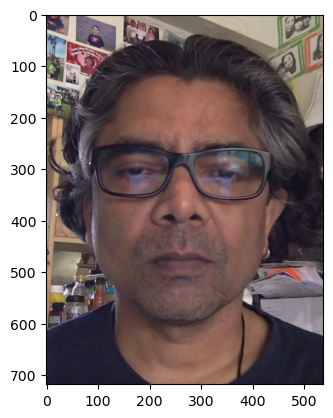

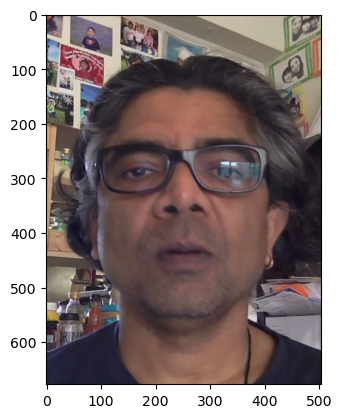

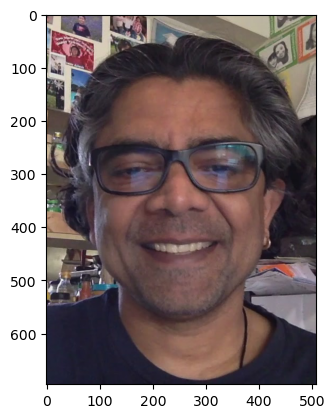

In [14]:
for img in images:
    print(img.info)
    plt.figure()
    plt.imshow(img)

### Extract and save these face thumbnails to the local disk 
- Download from Cloud

In [15]:
i = 1
for img in images:
    print(type(img))
    img.save('human-face' + str(i) + '.jpg')
    i= i+ 1

<class 'PIL.JpegImagePlugin.JpegImageFile'>
<class 'PIL.JpegImagePlugin.JpegImageFile'>
<class 'PIL.JpegImagePlugin.JpegImageFile'>


## Verify the download process 

In [16]:
!ls human-face*.jpg

human-face1.jpg  human-face2.jpg  human-face3.jpg


## Getting thumbnail from the SDK 

In [17]:
# Enter one of the thumbnail output you got from the previous cell, 
# under the "Getting Thumbnail ID from the Analysis JSON" section.
thumbnail_id='96e11802-fe9e-43d3-953c-001b4d939030'

In [18]:
img_code = video_analysis.get_thumbnail_from_video_indexer(video_id,  thumbnail_id)
print(img_code)

Getting thumbnail from video: cb253b1e43, thumbnail: 96e11802-fe9e-43d3-953c-001b4d939030
b'\xff\xd8\xff\xfe\x00\x10Lavc59.18.100\x00\xff\xdb\x00C\x00\x08\x04\x04\x04\x04\x04\x05\x05\x05\x05\x05\x05\x06\x06\x06\x06\x06\x06\x06\x06\x06\x06\x06\x06\x06\x07\x07\x07\x08\x08\x08\x07\x07\x07\x06\x06\x07\x07\x08\x08\x08\x08\t\t\t\x08\x08\x08\x08\t\t\n\n\n\x0c\x0c\x0b\x0b\x0e\x0e\x0e\x11\x11\x14\xff\xc4\x00\xb9\x00\x00\x02\x03\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x04\x03\x02\x01\x05\x06\x00\x07\x08\x01\x00\x03\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x10\x00\x02\x01\x03\x02\x03\x05\x05\x05\x06\x03\x06\x03\x05\x05\t\x01\x02\x03\x04\x00\x11\x12!1\x05A"Qa\x06\x132\x81\x91\x14q\xa1\xb1B#\x07R\xf0\xd1\xc1\x15b\xe13r\x82\xa2\xf1$\x16CS\x92\x934c\x83\xc2\xb2\x17\xb3%&s\xd3ET\xa3\xc35D\x94F\x11\x00\x02\x02\x01\x04\x01\x03\x02\x04\x03\x08\x03\x01\x01\x01\x00\x00\x01\x02\x11\x03!\x121\x04A"Q\x13a\x05qB2\x14\xf0\x81\x91\x063\xa1\xc1\xd1R\xb1#\xe1\

## Converting encoded image to visible image

Getting thumbnail from video: cb253b1e43, thumbnail: 96e11802-fe9e-43d3-953c-001b4d939030


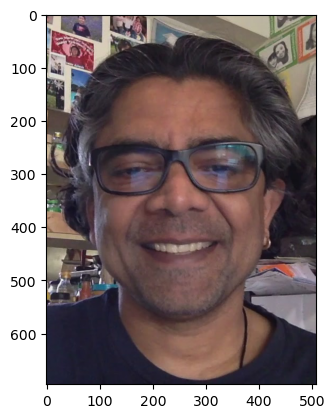

In [19]:
img_code = video_analysis.get_thumbnail_from_video_indexer(video_id,  thumbnail_id)
img_stream = io.BytesIO(img_code)
img = Image.open(img_stream)
imshow(img)

## Getting thumbnails using Keyframes 

In [20]:
keyframes = []
for shot in info["videos"][0]["insights"]["shots"]:
    for keyframe in shot["keyFrames"]:
        keyframes.append(keyframe["instances"][0]['thumbnailId'])

In [21]:
for keyframe in keyframes:
    img_str = video_analysis.get_thumbnail_from_video_indexer(video_id,  keyframe)

Getting thumbnail from video: cb253b1e43, thumbnail: cc20c57d-2837-4c60-b37c-410e8b3d3182
Getting thumbnail from video: cb253b1e43, thumbnail: 69ad8b96-11dd-4afb-84a5-d99bb424d07a


## Emotion from the Video Analyzer

In [22]:
info['summarizedInsights']['sentiments']

[{'sentimentKey': 'Neutral',
  'seenDurationRatio': 0.2931,
  'appearances': [{'startTime': '0:00:00',
    'endTime': '0:00:00.56',
    'startSeconds': 0,
    'endSeconds': 0.6},
   {'startTime': '0:00:08.08',
    'endTime': '0:00:10.574978',
    'startSeconds': 8.1,
    'endSeconds': 10.6}]},
 {'sentimentKey': 'Positive',
  'seenDurationRatio': 0.7092,
  'appearances': [{'startTime': '0:00:00.56',
    'endTime': '0:00:08.08',
    'startSeconds': 0.6,
    'endSeconds': 8.1}]}]

In [23]:
info['summarizedInsights']['emotions']

[{'type': 'Joy',
  'seenDurationRatio': 0.7092,
  'appearances': [{'startTime': '0:00:00.56',
    'endTime': '0:00:08.08',
    'startSeconds': 0.6,
    'endSeconds': 8.1}]}]

# Collecting Faces from  Video Analyzer

In [24]:
FACE_SERV_KEY = "1d4f70d496eb4e40aef496987ea87202"
FACE_SERV_ENDPOINT = "https://faceservicefacialrecog.cognitiveservices.azure.com/"

In [25]:
# Create a client
face_client = FaceClient(FACE_SERV_ENDPOINT, CognitiveServicesCredentials(FACE_SERV_KEY))

In [26]:
face_client.api_version

'1.0'

https://github.com/Azure-Samples/cognitive-services-quickstart-code/blob/master/python/Face/DetectIdentifyFace.py

# Creating Person Model Based on Faces in the Video

Note: this section is the same as the Facial recognition Demo. You can jump to the next section "Additional Resource: uploading a video from local disk to Video Analyzer portal" if you don't want to perform personal model again.

### We have already downloaded and saved the face thumbnails in the previous steps
- We will be using those face thumbnails here to build the Person model

In [27]:
PERSON_GROUP_ID = str(uuid.uuid4())
person_group_name = 'person-avkash'

# Note if this UUID already used earlier, you will get an error 

In [28]:
## This code is taken from Azure Face SDK 
## ---------------------------------------
def build_person_group(client, person_group_id, pgp_name):
    print('Create and build a person group...')
    # Create empty Person Group. Person Group ID must be lower case, alphanumeric, and/or with '-', '_'.
    print('Person group ID:', person_group_id)
    client.person_group.create(person_group_id = person_group_id, name=person_group_id)

    # Create a person group person.
    human_person = client.person_group_person.create(person_group_id, pgp_name)
    # Find all jpeg human images in working directory.
    human_face_images = [file for file in glob.glob('*.jpg') if file.startswith("human-face")]
    # Add images to a Person object
    for image_p in human_face_images:
        with open(image_p, 'rb') as w:
            client.person_group_person.add_face_from_stream(person_group_id, human_person.person_id, w)

    # Train the person group, after a Person object with many images were added to it.
    client.person_group.train(person_group_id)

    # Wait for training to finish.
    while (True):
        training_status = client.person_group.get_training_status(person_group_id)
        print("Training status: {}.".format(training_status.status))
        if (training_status.status is TrainingStatusType.succeeded):
            break
        elif (training_status.status is TrainingStatusType.failed):
            client.person_group.delete(person_group_id=PERSON_GROUP_ID)
            sys.exit('Training the person group has failed.')
        time.sleep(5)


In [29]:
build_person_group(face_client, PERSON_GROUP_ID, person_group_name)

Create and build a person group...
Person group ID: f4f97e2f-f821-4c68-9ff7-7e1ff6659254
Training status: succeeded.


# Making sure the Person model has faces and they all belong to the same person


In [30]:
'''
Detect all faces in query image list, then add their face IDs to a new list.
'''
def detect_faces(client, query_images_list):
    print('Detecting faces in query images list...')

    face_ids = {} # Keep track of the image ID and the related image in a dictionary
    for image_name in query_images_list:
        image = open(image_name, 'rb') # BufferedReader
        print("Opening image: ", image.name)
        time.sleep(5)

        # Detect the faces in the query images list one at a time, returns list[DetectedFace]
        faces = client.face.detect_with_stream(image)  

        # Add all detected face IDs to a list
        for face in faces:
            print('Face ID', face.face_id, 'found in image', os.path.splitext(image.name)[0]+'.jpg')
            # Add the ID to a dictionary with image name as a key.
            # This assumes there is only one face per image (since you can't have duplicate keys)
            face_ids[image.name] = face.face_id

    return face_ids

In [31]:
test_images = [file for file in glob.glob('*.jpg') if file.startswith("human-face")]

In [32]:
test_images

['human-face3.jpg', 'human-face1.jpg', 'human-face2.jpg']

In [33]:
ids = detect_faces(face_client, test_images)

Detecting faces in query images list...
Opening image:  human-face3.jpg
Face ID cc30cc44-42cc-4522-b272-aaa2fd434c91 found in image human-face3.jpg
Opening image:  human-face1.jpg
Face ID e617069b-0eee-43ab-be07-c9da97e2171d found in image human-face1.jpg
Opening image:  human-face2.jpg
Face ID 94e88538-a538-4ba7-a267-0ac7c835b413 found in image human-face2.jpg


In [34]:
ids

{'human-face3.jpg': 'cc30cc44-42cc-4522-b272-aaa2fd434c91',
 'human-face1.jpg': 'e617069b-0eee-43ab-be07-c9da97e2171d',
 'human-face2.jpg': '94e88538-a538-4ba7-a267-0ac7c835b413'}

### Verifying that 2 random images from the list belong to the same person
- #### Note: So far we have not used the face recognition part, only face detection.

In [35]:
# Verification example for faces of the same person.
verify_result = face_client.face.verify_face_to_face(ids['human-face1.jpg'], ids['human-face2.jpg'])

In [36]:
if verify_result.is_identical:
    print("Faces are of the same (Positive) person, similarity confidence: {}.".format(verify_result.confidence))
else:
    print("Faces are of different (Negative) persons, similarity confidence: {}.".format(verify_result.confidence))

Faces are of the same (Positive) person, similarity confidence: 0.90313.


## Matching face from ID card with face from Video Analyzer 

In [37]:
def show_image_in_cell(face_url):
    response = requests.get(face_url)
    img = Image.open(BytesIO(response.content))
    plt.figure(figsize=(10,5))
    plt.imshow(img)
    plt.show()

In [38]:
dl_source_url = 'https://raw.githubusercontent.com/udacity/cd0461-building-computer-vision-solutions-with-azure-exercises/main/resources/ca-dl-sample.png'


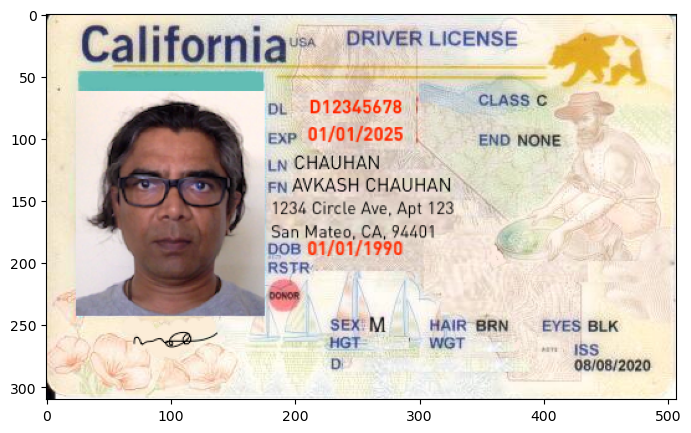

In [39]:
show_image_in_cell(dl_source_url)

In [40]:
## -------
## Reading file locally
## -------
# If I had image file locally, I would have used the following method
# dl_image = open('/Users/avkashchauhan99/work/avkash/udacity/cal-dl.png', 'rb')
# dl_faces = face_client.face.detect_with_stream(dl_image)  

In [41]:
dl_faces = face_client.face.detect_with_url(dl_source_url) 

## Viewing Face ID and then saving it into the list of already saved Face IDs

In [42]:
for face in dl_faces:
    print('Face ID', face.face_id, 'found in image', dl_source_url)
    # Add the ID to a dictionary with image name as a key.
    # This assumes there is only one face per image (since you can't have duplicate keys)
    ids['ca-dl-sample.png'] = face.face_id

Face ID 15f66349-1860-4b80-b506-9b3616168945 found in image https://raw.githubusercontent.com/udacity/cd0461-building-computer-vision-solutions-with-azure-exercises/main/resources/ca-dl-sample.png


## Now, we have 4 + 1 = 5 Face IDs in our Face ID list

In [43]:
ids

{'human-face3.jpg': 'cc30cc44-42cc-4522-b272-aaa2fd434c91',
 'human-face1.jpg': 'e617069b-0eee-43ab-be07-c9da97e2171d',
 'human-face2.jpg': '94e88538-a538-4ba7-a267-0ac7c835b413',
 'ca-dl-sample.png': '15f66349-1860-4b80-b506-9b3616168945'}

## Perform face verification between the Face ID from the identity card and one of the Face IDs from the video

In [49]:
# Verification example for faces of the same person.
dl_verify_result = face_client.face.verify_face_to_face(ids['human-face1.jpg'], ids['ca-dl-sample.png'])

In [50]:
if dl_verify_result.is_identical:
    print("Faces are of the same (Positive) person, similarity confidence: {}.".format(dl_verify_result.confidence))
else:
    print("Faces are of different (Negative) persons, similarity confidence: {}.".format(dl_verify_result.confidence))

Faces are of the same (Positive) person, similarity confidence: 0.84262.


In [51]:
ids['ca-dl-sample.png']

'15f66349-1860-4b80-b506-9b3616168945'

In [52]:
ids.values()

dict_values(['cc30cc44-42cc-4522-b272-aaa2fd434c91', 'e617069b-0eee-43ab-be07-c9da97e2171d', '94e88538-a538-4ba7-a267-0ac7c835b413', '15f66349-1860-4b80-b506-9b3616168945'])

In [53]:
dl_faces[0].face_rectangle.as_dict()

{'width': 99, 'height': 99, 'left': 53, 'top': 110}

In [54]:
# TAKEN FROM THE Azure SDK Sample
# Convert width height to a point in a rectangle
def getRectangle(faceDictionary):
    rect = faceDictionary.face_rectangle
    left = rect.left
    top = rect.top
    right = left + rect.width
    bottom = top + rect.height
    
    return ((left, top), (right, bottom))

In [55]:
def drawFaceRectangles(source_file, detected_face_object) :
    # Download the image from the url
    response = requests.get(source_file)
    img = Image.open(BytesIO(response.content))
    # Draw a red box around every detected faces
    draw = ImageDraw.Draw(img)
    for face in detected_face_object:
        draw.rectangle(getRectangle(face), outline='red', width = 10)
    return img

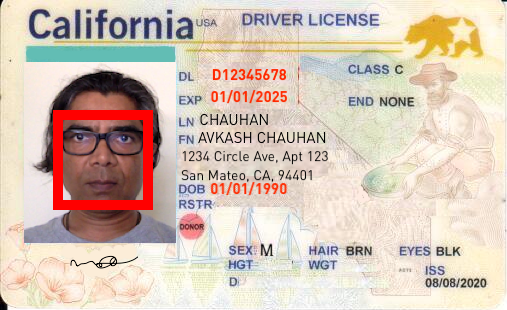

In [56]:
drawFaceRectangles(dl_source_url, dl_faces)

## Matching Face ID from the identity card with Video Analyzer Person Model 

In [57]:
# A list of Face ID
ids

{'human-face3.jpg': 'cc30cc44-42cc-4522-b272-aaa2fd434c91',
 'human-face1.jpg': 'e617069b-0eee-43ab-be07-c9da97e2171d',
 'human-face2.jpg': '94e88538-a538-4ba7-a267-0ac7c835b413',
 'ca-dl-sample.png': '15f66349-1860-4b80-b506-9b3616168945'}

## Using the face ID from the identify card and matching the identity with the Person Group model

In [58]:
# Enter the face ID of ca-dl-sample.png from the output of the cell above
get_the_face_id_from_the_driving_license = '15f66349-1860-4b80-b506-9b3616168945'

In [59]:
person_gp_results = face_client.face.identify([get_the_face_id_from_the_driving_license], PERSON_GROUP_ID)

In [60]:
for result in person_gp_results:
    for candidate in result.candidates:
        print("The Identity match confidence is {}".format(candidate.confidence))

The Identity match confidence is 0.83777
